**FUNÇÕES DE ATIVAÇÃO**

-4.4


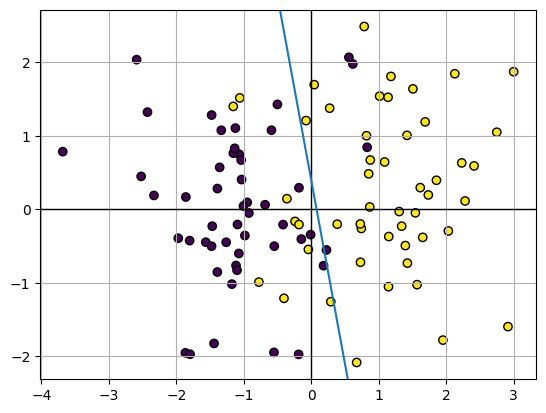

In [4]:
import torch
from torch import nn

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)
X, Y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)

def plotmodel(w1, w2, b):

  plt.scatter(X[:,0], X[:,1], marker = 'o', c=Y, edgecolor = 'k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2,4,50)
  y = (-w1*x -b)/w2

  plt.axvline(0,-1,1, color = 'k', linewidth=1)
  plt.axhline(0,-2,4, color = 'k', linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5  #a
w2 = 1   #b
b = -0.4    #c
plotmodel(w1, w2, b)

p = (-1, 1)

print(w1 * p[0] + w2 * p[1] + b)

In [8]:
perceptron = nn.Linear(2, 1)                               # Criando perceptron
sigmoide = nn.Sigmoid()                                    # Criando função de ativação

perceptron.weight = nn.Parameter(torch.Tensor([[5, 1]]))   # Setando wieghht manualmente
perceptron.bias = nn.Parameter(torch.Tensor([-0.4]))       # Setando bias manualmente

print(perceptron.weight.data)

print(perceptron.bias.data)

tensor([[5., 1.]])
tensor([-0.4000])


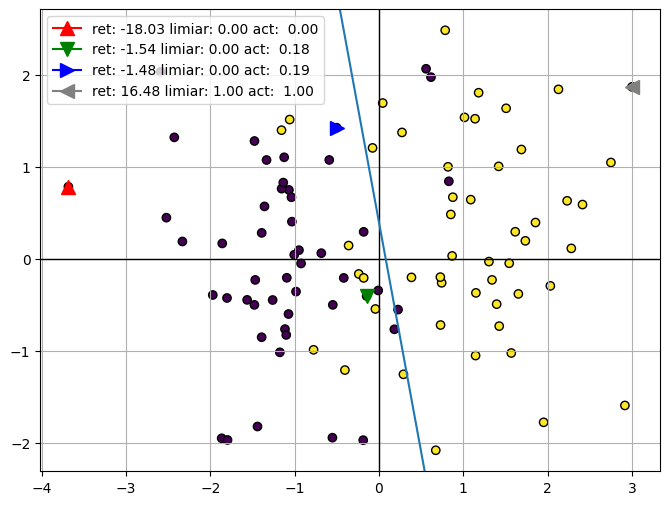

In [16]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()